In [1]:
from collections import Counter
import scanpy.api  as sc
import numpy as np
import pandas as pd
import anndata
import os
%matplotlib inline
from matplotlib import pyplot as plt

/home/mt/code/utils/miniconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/mt/code/utils/miniconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [ ]:

f = sc.read("/ye/yelabstore2/mtschmitz/dolomite/demux/pollena-Mix-separated/summary/Mix_S4_L001_umi_expression_matrix.tsv").transpose()
g = sc.read("/ye/yelabstore2/mtschmitz/dolomite/demux/pollena-Mix-separated/summary/Mix_S4_L002_umi_expression_matrix.tsv").transpose()

#f = sc.read("/home/mt/Downloads/Mix/Mix_S4_L001_umi_expression_matrix.tsv").transpose()
#g = sc.read("/home/mt/Downloads/Mix/Mix_S4_L002_umi_expression_matrix.tsv").transpose()

c = f.concatenate(g,index_unique=None)

len(c.obs_names)
len(set(c.obs_names))

cc = Counter(c.obs_names)
cc.most_common(10)



In [ ]:
cc.most_common(10)

In [ ]:
X=[]
for u in set(c.obs_names):
    X.append(c.X[c.obs_names==u,:].sum(axis=0))
X=np.array(X)

In [ ]:
adata = anndata.AnnData(X= X,var = pd.DataFrame(index=c.var_names),obs=pd.DataFrame(index=list(set(c.obs_names))))

In [ ]:
sc.pp.filter_cells(adata, min_genes=500)
print(adata.shape)

In [7]:
mito_genes = [name for name in adata.var_names if name.startswith('MT-')]
ribo_genes = [name for name in adata.var_names if name.startswith('RPS') or name.startswith('RPL') ]

# for each cell compute fraction of counts in mito genes vs. all genes
# the `.A1` is only necessary, as X is sparse - it transform to a dense array after summing
adata.obs['percent_mito'] = np.sum(
    adata[:, mito_genes].X, axis=1) / np.sum(adata.X, axis=1)
adata.obs['percent_ribo'] = np.sum(
    adata[:, ribo_genes].X, axis=1) / np.sum(adata.X, axis=1)
# add the total counts per cell as observations-annotation to adata
adata.obs['n_counts'] = adata.X.sum(axis=1)
sc.pp.filter_genes(adata, min_cells=100)


adata=adata[np.argsort(adata.obs['n_counts']),:]

In [8]:
adata.obs.to_csv(os.path.expanduser('~/MixObs.txt'))

n_genes  percent_mito  percent_ribo  n_counts
CCATTTGAAATC       61      0.000000      0.038095     105.0
ACGGGTACCTCT       43      0.000000      0.090909      66.0
TGCTAGCAAGTG      147      0.025735      0.143382     272.0
ATCCCGGGGCTA      129      0.022026      0.242291     227.0
CATTCCAGGGCC       45      0.064516      0.107527      93.0
CTTCGCTTCAGT       80      0.025641      0.192308     156.0
ACCGTCCGAATT       49      0.000000      0.089888      89.0
TGAGAGCATCGC       72      0.050633      0.050633      79.0
ATGCTCGCTATT       33      0.000000      0.155172      58.0
ACTAGTTGAGGG       48      0.238532      0.091743     109.0
ATTTTGTTCTAT       35      0.075000      0.200000      40.0
AAGGACTTTCAG       43      0.000000      0.107143      84.0
ACGGGACAGTCG       45      0.016807      0.067227     119.0
ATTATATGGGTG       70      0.108108      0.081081     148.0
TTCCCTTTAACG       40      0.025000      0.075000      80.0
GAGTATCCAACC       31      0.000000      0.025000      40.0
CTTCCTACCATG       78      0.054217      0.078313     166.0
GTTCGCCAGTTA       48      0.020202      0.212121      99.0
GACTCCTTGGCA      194      0.068063      0.036649     382.0
CAAACGCAAAGA       34      0.000000      0.044776      67.0
ACCTCTGGACCC       40      0.000000      0.074074      81.0
GTTCCGTTCGAG      102      0.000000      0.155738     122.0
AAAACGTCCATC       64      0.000000      0.066667     105.0
AACGCCCGATCC       53      0.000000      0.129032      93.0
CATCAGAGCATG       54      0.040816      0.642857      98.0
TGGTTCGCGTAC       38      0.050633      0.126582      79.0
GGTATGGTCTGC       54      0.100000      0.127273     110.0
GGGAGGTACCCA       44      0.025641      0.166667      78.0
GATATGCAGGTC      259      0.006623      0.099338     302.0
GTACCCCTAGTN       38      0.027397      0.205479      73.0
...               ...           ...           ...       ...
AAGACCTGTAAG      271      0.060417      0.118750     480.0
ATCCATGTTGTT       61      0.133803      0.021127     142.0
CTCATTTGCTAG       52      0.115942      0.144928      69.0
TTTCCCCAAGTG       57      0.022472      0.078652      89.0
ATCAAACACGTC       63      0.138686      0.094891     137.0
CGGAGTGCAGGA      195      0.000000      0.224215     223.0
ATATCTGGTGGA       86      0.118644      0.067797     177.0
GATATTCCGGTC      169      0.005236      0.062827     191.0
GCGTGATCCGCT       37      0.164384      0.095890      73.0
GTAGGTGGGGAC      105      0.022556      0.187970     133.0
CTCAACCAGCGC       37      0.000000      0.024390      82.0
ATAGTTCTCACC       34      0.016129      0.000000      62.0
CTTTTCATGACT      150      0.005747      0.298851     174.0
AAAATTTTAGAG       37      0.040000      0.026667      75.0
GTAGGTGGGGCA       59      0.078947      0.092105      76.0
TCTAGCCACCTT      374      0.001100      0.053905     909.0
GCAGAATCGAAC       34      0.081081      0.040541      74.0
CCGGTCTCCCGC     2760      0.001239      0.171227   10489.0
CTAGCTTTCTCC       78      0.055215      0.141104     163.0
AATGCTGGGGCG       42      0.000000      0.040816      49.0
GATTGCTCCTAC       41      0.000000      0.024390      82.0
CTCTAAGTCCTG       49      0.039216      0.117647     102.0
CGACTACAATGT       32      0.082192      0.068493      73.0
GAGTCATTATTC       74      0.113333      0.120000     150.0
AATTGCACCCAC       48      0.026786      0.205357     112.0
GCTCCACGGAGC      141      0.046392      0.108247     194.0
TAACAGCAGCGC       47      0.012346      0.111111      81.0
TATGGTCGACGA       33      0.031250      0.109375      64.0
CACATTAACTTG       51      0.054054      0.099099     111.0
CCAACCTCATGA       67      0.069444      0.194444     144.0

[2913 rows x 4 columns]

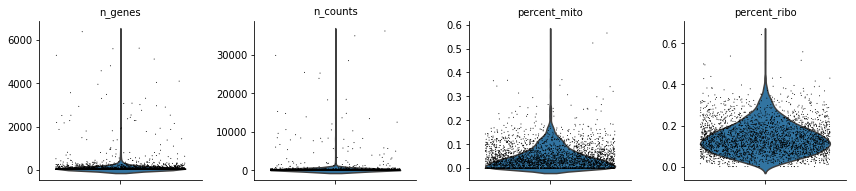

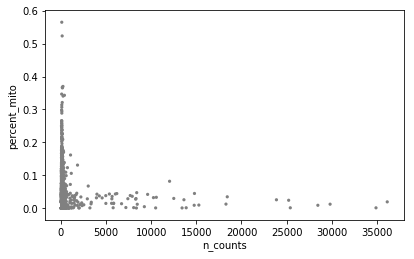

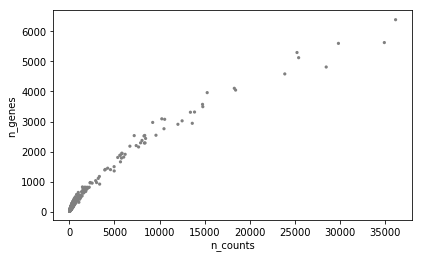

In [9]:
sc.pl.violin(adata, ['n_genes', 'n_counts', 'percent_mito','percent_ribo'],
             jitter=0.4, multi_panel=True)
sc.pl.scatter(adata, x='n_counts', y='percent_mito')
sc.pl.scatter(adata, x='n_counts', y='n_genes')

/home/mt/code/utils/miniconda3/lib/python3.6/site-packages/umi_tools/umi_methods.py:22: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/mt/code/utils/miniconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/mt/code/utils/miniconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/mt/code/utils/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/mt/code/utils/miniconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/mt/code/utils/miniconda3/lib/python3.6/site-pa

36.157000000000004
[4.55819239 4.54294985 4.47455133 ... 1.5797836  1.5797836  1.56820172]
(array([3737, 4609, 5186, 6220, 6692, 7571, 8343, 9212, 9842]),)
1


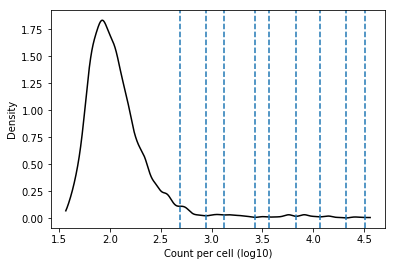

In [10]:
from umi_tools import umi_methods
import matplotlib
from matplotlib import pyplot as plt
from collections import Counter
cell_barcode_counts=Counter(adata.obs.n_counts.to_dict())
#d=umi_tools.umi_methods.getKneeEstimate(Counter(adata.obs.n_counts.to_dict()),expect_cells=15000,plotfile_prefix='KneeOrganoid')

import matplotlib.lines as mlines
from functools import partial
from scipy.signal import argrelextrema
from scipy.stats import gaussian_kde
import umi_tools.Utilities as U

threshold = 0.001 * cell_barcode_counts.most_common(1)[0][1]

counts = sorted(cell_barcode_counts.values(), reverse=True)
counts_thresh = [x for x in counts if x > threshold]
log_counts = np.log10(counts_thresh)
print(threshold)
print(log_counts)
density = gaussian_kde(log_counts, bw_method=0.1)

xx_values = 10000  # how many x values for density plot
xx = np.linspace(log_counts.min(), log_counts.max(), xx_values)

local_min = None
local_mins = argrelextrema(density(xx), np.less)
print(local_mins)
print(len(local_mins))
fig = plt.figure()
fig1 = fig.add_subplot(111)
fig1.plot(xx, density(xx), 'k')
fig1.set_xlabel("Count per cell (log10)")
fig1.set_ylabel("Density")
for pos in xx[local_mins]:
    fig1.axvline(x=pos, ls="dashed")

In [11]:
adata.raw = adata

In [12]:
sc.pp.normalize_per_cell(adata,counts_per_cell=1e4)
sc.pp.log1p(adata)
sc.pp.scale(adata, max_value=10)
sc.pp.regress_out(adata,'n_counts')

In [13]:
sc.tl.pca(adata)
adata.obsm['X_pca'] *= -1  # multiply by -1 to match Seurat

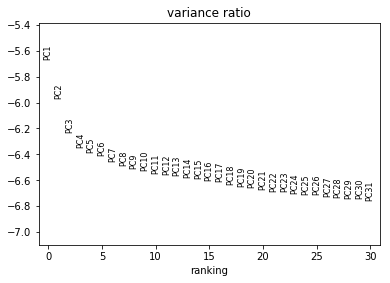

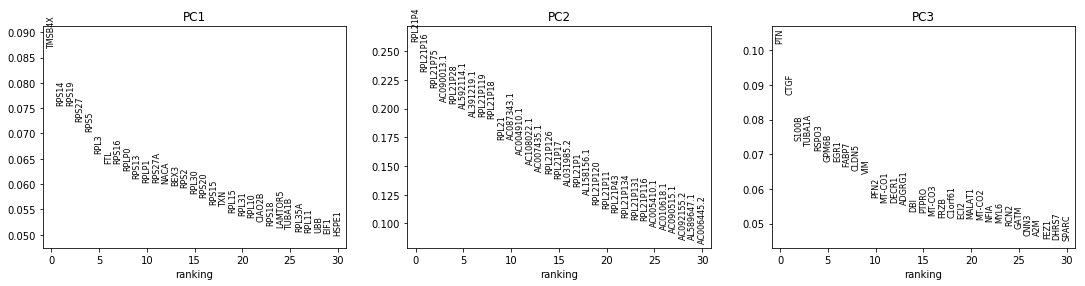

In [14]:
sc.pl.pca_variance_ratio(adata, log=True)
sc.pl.pca_loadings(adata)

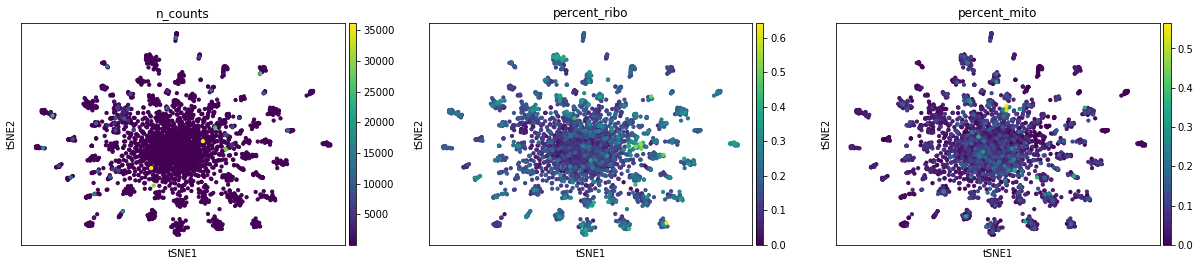

In [15]:
sc.tl.tsne(adata, random_state=2, n_pcs=50)
sc.pl.tsne(adata, color=['n_counts','percent_ribo','percent_mito'])

In [ ]:
sc.pp.neighbors(adata, n_neighbors=25)
sc.tl.louvain(adata)
sc.pl.tsne(adata,color=['louvain','n_counts'])

In [ ]:
sc.tl.rank_genes_groups(adata, 'louvain')
sc.pl.rank_genes_groups(adata, n_genes=30, save='.pdf')
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(20)


In [ ]:
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
pd.DataFrame({group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'scores']}).head(20)

In [ ]:
adata = anndata.AnnData(X= X,var = pd.DataFrame(index=c.var_names),obs=pd.DataFrame(index=list(set(c.obs_names))))

In [3]:
sc.pp.filter_cells(adata, min_genes=1000)
sc.pp.filter_genes(adata, min_cells=20)
adata.write("./Mix.h5ad")

(1345, 20429)


In [5]:
adata = sc.read_h5ad('/home/mt/Downloads/Mix.h5ad')
adata.var['Mouse'] = [any([y.islower() for y in x]) for x in adata.var.index]
adata.obs['PercentM'] = np.sum(adata.X[:,adata.var['Mouse']],axis=1)/np.sum(adata.X,axis=1)

(array([1.42e+03, 8.00e+00, 3.00e+00, 2.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00]),
 array([  0. ,  53.9, 107.8, 161.7, 215.6, 269.5, 323.4, 377.3, 431.2,
        485.1, 539. ], dtype=float32),
 <a list of 10 Patch objects>)

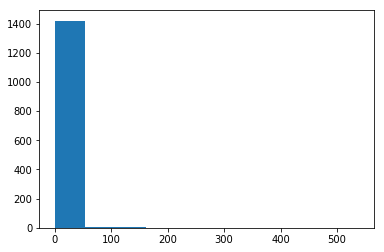

In [17]:
plt.hist(np.array(adata[:,'GFP'].X))

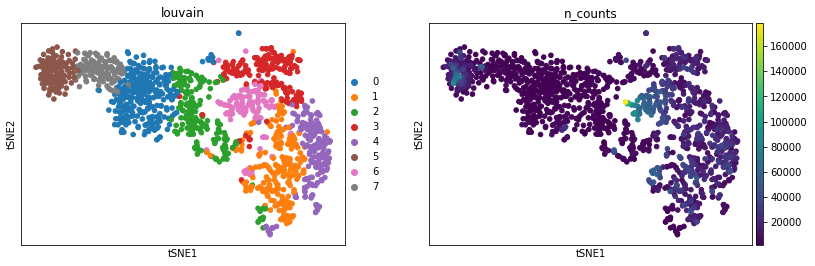

In [18]:
sc.pp.normalize_per_cell(adata,counts_per_cell=1e4)
sc.pp.log1p(adata)
sc.pp.scale(adata, max_value=10)
sc.pp.regress_out(adata,'n_counts')
sc.tl.pca(adata)
adata.obsm['X_pca'] *= -1  # multiply by -1 to match Seurat
sc.tl.tsne(adata)
sc.pp.neighbors(adata)
sc.tl.louvain(adata)
sc.pl.tsne(adata,color=['louvain','n_counts'])

saving figure to file ./figures/rank_genes_groups_louvain.pdf


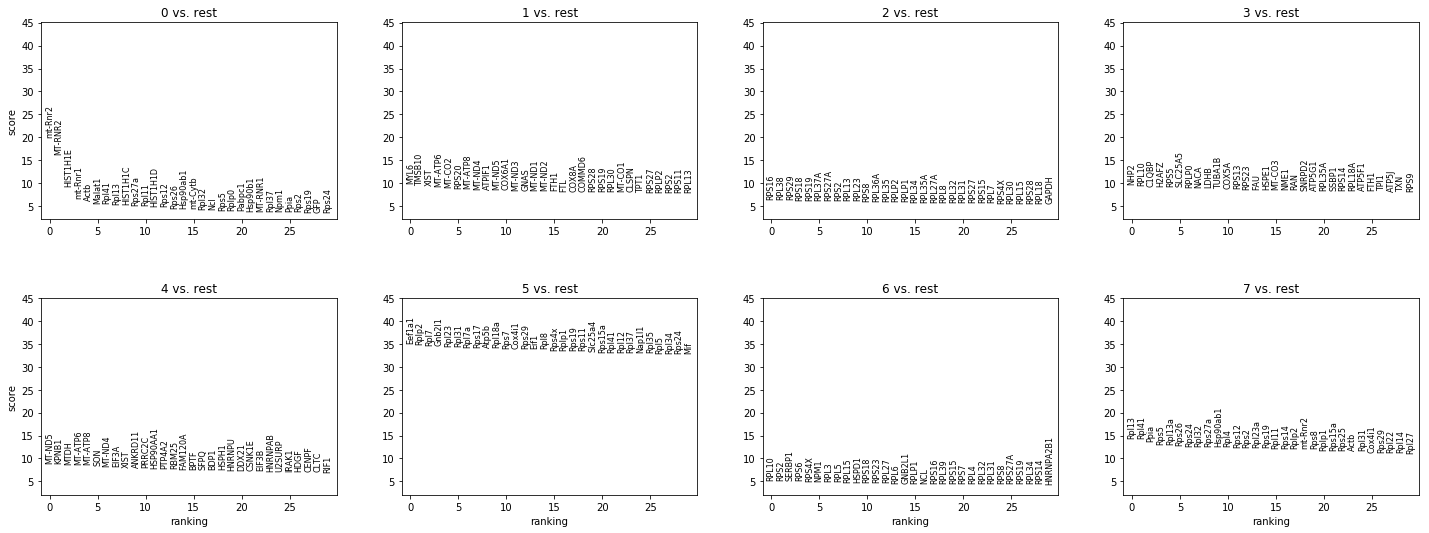

0        1       2        3         4        5       6         7
0    mt-Rnr2     MYL6   RPS16     NHP2    MT-ND5   Eef1a1   RPL10     Rpl13
1    MT-RNR2   TMSB10   RPL38    RPL10     KPNB1    Rplp2    RPS2     Rpl41
2   HIST1H1E     XIST   RPS29    C1QBP      MTDH     Rpl7  SERBP1      Ppia
3    mt-Rnr1  MT-ATP6   RPS18    H2AFZ   MT-ATP6   Gnb2l1    RPS6      Rps5
4       Actb   MT-CO2   RPS19     RPS5   MT-ATP8    Rpl23   RPS4X    Rpl13a
5     Malat1    RPS20  RPL37A  SLC25A5       SON    Rpl31    NPM1     Rps26
6      Rpl41  MT-ATP8  RPS27A    RPLP0    MT-ND4    Rpl7a    RPL3     Rps24
7      Rpl13   MT-ND4    RPS2     NACA     EIF3A    Rps17    RPL5     Rpl32
8   HIST1H1C   ATPIF1   RPL13     LDHB      XIST    Atp5b   RPL15    Rps27a
9     Rps27a   MT-ND5   RPL23   TUBA1B   ANKRD11   Rpl18a   HSPD1  Hsp90ab1
10     Rpl11   COX6A1    RPS8    COX5A    PRRC2C     Rps7   RPS18      Rpl4
11  HIST1H1D   MT-ND3  RPL36A    RPS13  HSP90AA1   Cox4i1   RPS23     Rps12
12     Rps12     GNAS   RPL35    RPS23    PTP4A2    Rps29   RPL27      Rps2
13     Rps26   MT-ND1   RPLP2      FAU     RBM25     Eif1    RPL6    Rpl23a
14  Hsp90ab1   MT-ND2   RPLP1    HSPE1   FAM120A     Rpl8  GNB2L1     Rps19
15   mt-Cytb     FTH1   RPL34   MT-CO3      BPTF    Rps4x   RPLP1     Rpl11
16     Rpl32      FTL  RPL35A     NME1      SFPQ    Rplp1     NCL     Rps14
17       Ncl    COX8A  RPL27A      RAN      BDP1    Rps19   RPS16     Rplp2
18      Rps5   COMMD6    RPL8   SNRPD2     HSPH1    Rps11   RPL39   mt-Rnr2
19     Rplp0    RPS28   RPL32   ATP5G1    HNRNPU  Slc25a4   RPS15      Rps8

In [19]:
sc.tl.rank_genes_groups(adata, groupby='louvain',use_raw=True)
sc.pl.rank_genes_groups(adata, n_genes=30, save='.pdf')
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(20)


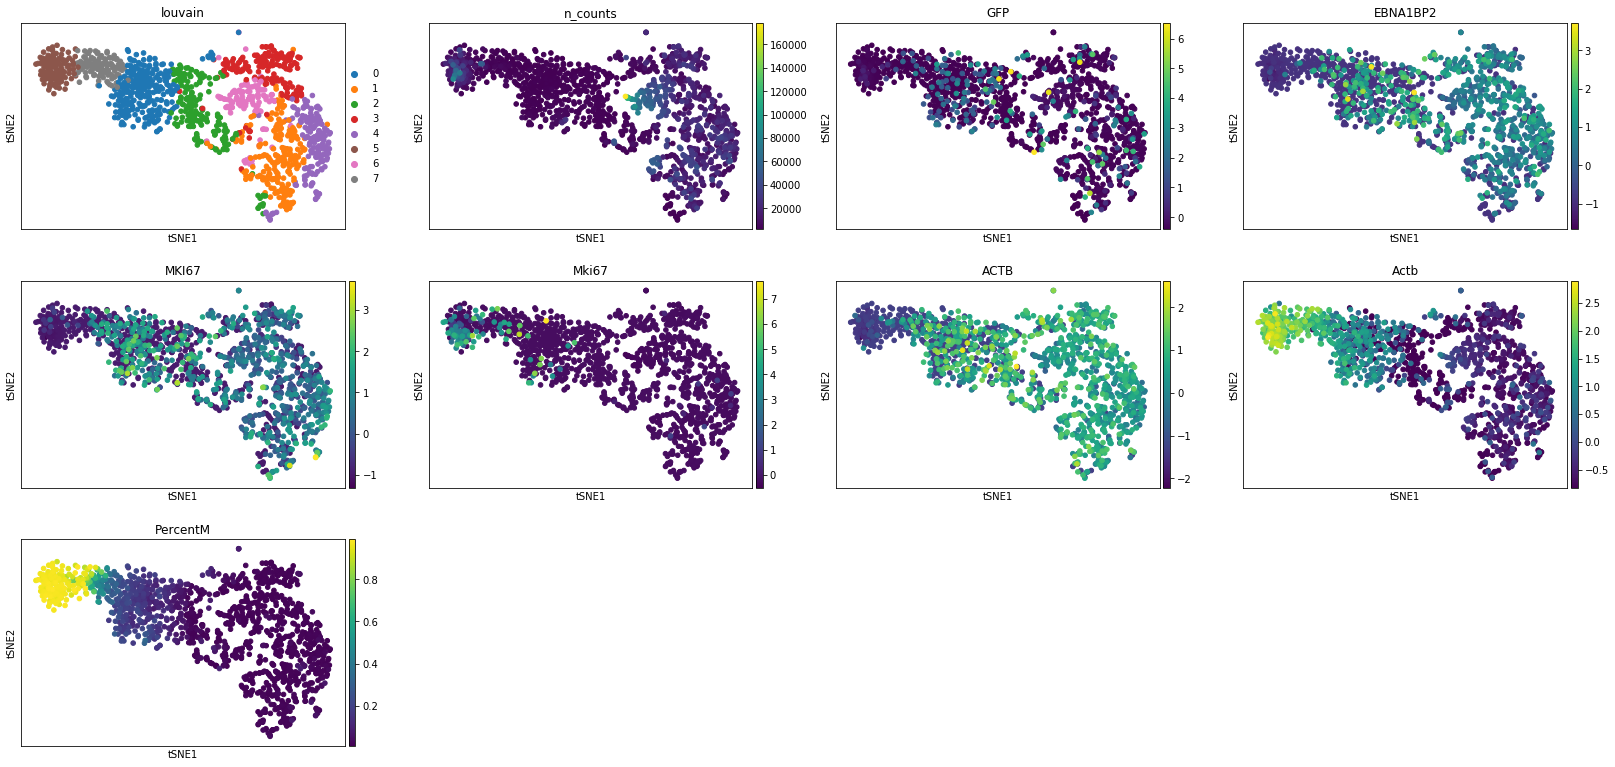

In [20]:
sc.pl.tsne(adata,color=['louvain','n_counts','GFP','EBNA1BP2','MKI67','Mki67','ACTB','Actb','PercentM'])

In [26]:
np.sum(adata.obs.PercentM<.5)

1266

(array([975., 184.,  65.,  24.,  18.,   9.,   4.,   9.,   6., 140.]),
 array([0.0086661 , 0.10687425, 0.20508239, 0.30329055, 0.40149868,
        0.49970683, 0.597915  , 0.6961231 , 0.79433125, 0.89253944,
        0.9907476 ], dtype=float32),
 <a list of 10 Patch objects>)

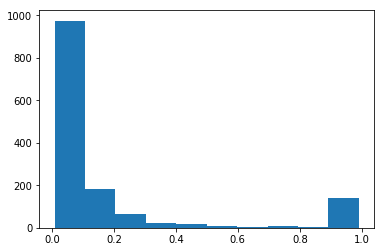

In [27]:
plt.hist(adata.obs.PercentM)

In [4]:
CellTagTable=pd.read_csv('/home/mt/Downloads/CellTagTable.txt').T

In [7]:
adata.obs.loc[CellTagTable.index,]

/home/mt/code/utils/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


n_genes  PercentM
ATCGTCAGGAAA      NaN       NaN
GGGCTTGGCACG      NaN       NaN
GGTATTTATGTC      NaN       NaN
CCGCGAGGCTAC      NaN       NaN
TCTCGACGTCTC      NaN       NaN
TCGTCTGTGTAG   4782.0  0.018941
GAGTGTAGGTCA   4209.0  0.016293
CCAAGCTTTTGA   4136.0  0.017681
CATCTACGGAGG      NaN       NaN
CATAGATTTAAC   5345.0  0.015001
GGAGTGTGGTAT      NaN       NaN
TTGTAAGTTTTC   1102.0  0.168773
TACACCTCGGAA      NaN       NaN
ACCAGGGCGTAT   4991.0  0.013929
TATTTGTTAATG      NaN       NaN
AGCAGTTGTTTA      NaN       NaN
GAAGCTCGTCGA   5218.0  0.016201
ACTCGAAGCTAT   3659.0  0.018874
GCAGGTCCCTAT      NaN       NaN
CCTCGCCCGGTA      NaN       NaN
CGCGTATTGTGT   5635.0  0.022503
CACGAGTTCGGA   4112.0  0.020791
TTATGCCTGGCG      NaN       NaN
AATTAGGTAACC      NaN       NaN
GAAAGATTCTAA   1442.0  0.068656
CCCCTCGCGGCG   1324.0  0.776603
GTGGGGCACACT      NaN       NaN
CATAGCTTTACA      NaN       NaN
CGCGGCCTTAGA      NaN       NaN
CAAAGCAAGGTC      NaN       NaN
...               ...       ...
GATGTAGGTCAC      NaN       NaN
CAGGGCACGAAT      NaN       NaN
CGTAGAATCCAT      NaN       NaN
GGGCGGGACAGG      NaN       NaN
AGTACTTCCCAA   4582.0  0.013810
CTCGCCAGCTCG      NaN       NaN
ACTGCCAACGAG      NaN       NaN
ACTACGTCAACG      NaN       NaN
AGGTGCCAAATC      NaN       NaN
GAACGAATTTTT      NaN       NaN
CTATCTTGGTGA      NaN       NaN
ATGTCACGGGCC      NaN       NaN
CGGGGTATAGCT   1592.0  0.044515
CGTCCCTCTCCA      NaN       NaN
CGTACGACTAGG      NaN       NaN
CCGGACCGCGTA      NaN       NaN
ATCTCAGAGGCT      NaN       NaN
AAACGAACTTCG      NaN       NaN
GTTCAGCCGTGT      NaN       NaN
CGAGCACGCCTG      NaN       NaN
CGATGATGATAG      NaN       NaN
GGTAATAGTAGA      NaN       NaN
CAAGTGAGTGCT      NaN       NaN
AATCGGCGGGAG      NaN       NaN
ACGTTTTGCCTA      NaN       NaN
TTTCGGGCTGCT      NaN       NaN
CGCATCCGGACT      NaN       NaN
TCTAGTCGCGCC      NaN       NaN
TGCTTGCACAAA      NaN       NaN
TAACTGTTCACA      NaN       NaN

[974 rows x 2 columns]

In [10]:
np.sum(np.array([x in adata.obs.index for x in CellTagTable.index]))

165

In [15]:
def intersection(lst1, lst2): 
    return list(set(lst1) & set(lst2)) 
  
len(intersection(adata.obs.index,CellTagTable.index))

165